<a href="https://colab.research.google.com/github/prcstak/service_text_recognition/blob/main/notebooks/Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install wandb -qU

In [6]:
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Config

In [7]:
# Start a run, tracking hyperparameters
run = wandb.init(
    # set the wandb project where this run will be logged
    project="mnist_training",
    # track hyperparameters and run metadata with wandb.config
    config={
        "optimizer": "Adam",
        "loss": "categorical_crossentropy",
        "metric": "accuracy",
        "epoch": 8,
        "batch_size": 254,
    },
)

wandb: Currently logged in as: prcstak. Use `wandb login --relogin` to force relogin


In [8]:
config = run.config

# Experiment code:


---



## Imports

In [9]:
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

## Model

Подготовка данных

In [10]:
# Подготовка данных

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


5


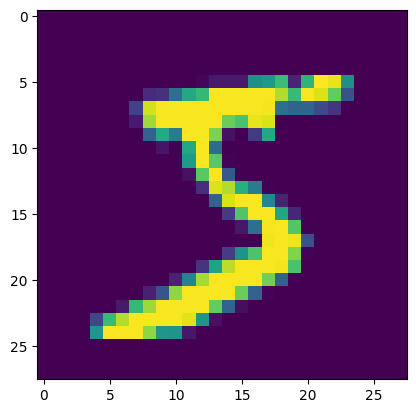

In [11]:
plt.imshow(x_train[0])
print(y_train[0])

In [12]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

x_train = x_train/255
x_test = x_test/255

Создание модели

In [15]:
model = Sequential([
    Conv2D(64, 3, activation='relu', padding="same", input_shape=(28,28, 1)),
    Flatten(),
    Dense(128, "sigmoid"),
    Dense(10, "softmax")
])

Тренировка модели

In [16]:
model.compile(optimizer=config.optimizer, loss=config.loss, metrics=[config.metric])
history = model.fit(x_train, y_train,
                    batch_size=config.batch_size,
                    epochs=config.epoch,
                    validation_data=(x_test, y_test),
                   callbacks=[
        WandbMetricsLogger(log_freq=5),
        WandbModelCheckpoint("models"),
    ],)

Epoch 1/8
237/237 [==============================] - ETA: 0s - loss: 0.3038 - accuracy: 0.9203

wandb: Adding directory to artifact (./models)... Done. 0.4s


237/237 [==============================] - 53s 220ms/step - loss: 0.3038 - accuracy: 0.9203 - val_loss: 0.1169 - val_accuracy: 0.9693
Epoch 2/8
237/237 [==============================] - ETA: 0s - loss: 0.0870 - accuracy: 0.9781

wandb: Adding directory to artifact (./models)... Done. 0.5s


237/237 [==============================] - 49s 206ms/step - loss: 0.0870 - accuracy: 0.9781 - val_loss: 0.0715 - val_accuracy: 0.9798
Epoch 3/8
237/237 [==============================] - ETA: 0s - loss: 0.0515 - accuracy: 0.9871

wandb: Adding directory to artifact (./models)... Done. 0.4s


237/237 [==============================] - 50s 209ms/step - loss: 0.0515 - accuracy: 0.9871 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 4/8
237/237 [==============================] - ETA: 0s - loss: 0.0344 - accuracy: 0.9920

wandb: Adding directory to artifact (./models)... Done. 0.5s


237/237 [==============================] - 54s 227ms/step - loss: 0.0344 - accuracy: 0.9920 - val_loss: 0.0480 - val_accuracy: 0.9849
Epoch 5/8
237/237 [==============================] - ETA: 0s - loss: 0.0233 - accuracy: 0.9953

wandb: Adding directory to artifact (./models)... Done. 0.5s


237/237 [==============================] - 51s 214ms/step - loss: 0.0233 - accuracy: 0.9953 - val_loss: 0.0473 - val_accuracy: 0.9845
Epoch 6/8
237/237 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 0.9976

wandb: Adding directory to artifact (./models)... Done. 0.5s


237/237 [==============================] - 50s 211ms/step - loss: 0.0160 - accuracy: 0.9976 - val_loss: 0.0487 - val_accuracy: 0.9836
Epoch 7/8
237/237 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9983

wandb: Adding directory to artifact (./models)... Done. 0.4s


237/237 [==============================] - 52s 220ms/step - loss: 0.0110 - accuracy: 0.9983 - val_loss: 0.0435 - val_accuracy: 0.9852
Epoch 8/8
237/237 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9994

wandb: Adding directory to artifact (./models)... Done. 0.5s


237/237 [==============================] - 50s 211ms/step - loss: 0.0076 - accuracy: 0.9994 - val_loss: 0.0442 - val_accuracy: 0.9858




---



In [ ]:
run.finish()